In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
# preprocess data
# encode categorical data with numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['Kyphosis'])
df['Kyphosis'] = encoder.transform(df['Kyphosis'])
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null int64
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(4)
memory usage: 2.6 KB


In [7]:
df.describe()

,Kyphosis,Age,Number,Start
count,81.000000,81.000000,81.000000,81.000000
mean,0.209877,83.654321,4.049383,11.493827
std,0.409758,58.104251,1.619423,4.883962
min,0.000000,1.000000,2.000000,1.000000
25%,0.000000,26.000000,3.000000,9.000000
50%,0.000000,87.000000,4.000000,13.000000
75%,0.000000,130.000000,5.000000,16.000000
max,1.000000,206.000000,10.000000,18.000000


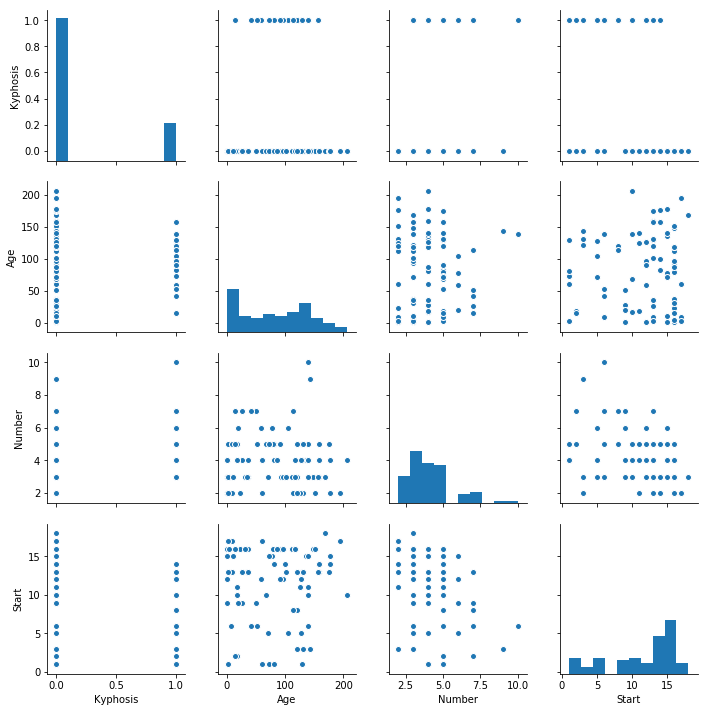

In [8]:
sns.pairplot(data=df)

In [15]:
# divide data into features and labels
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

print(X.shape)
print(y.shape)

(81, 3)
(81,)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [28]:
# training a decision tree classifier for classification task
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

[[20  2]
 [ 2  1]]
0.84
             precision    recall  f1-score   support

          0       0.91      0.91      0.91        22
          1       0.33      0.33      0.33         3

avg / total       0.84      0.84      0.84        25



In [ ]:
# Decision Tree Visualization 



In [26]:
# training ensemble model for classification

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
predictions = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[21  1]
 [ 2  1]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93        22
          1       0.50      0.33      0.40         3

avg / total       0.86      0.88      0.87        25

0.88
